In [1]:
##-----------------------------------------------------------------------------
## Import
##-----------------------------------------------------------------------------
import time
import os
import h5py
import math
#import warnings
#warnings.simplefilter(action = "ignore", category = RuntimeWarning)

import scipy.io as sio 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import TensorBoard
#from newv_focal_loss import *

##-----------------------------------------------------------------------------
## GPU Selection
##-----------------------------------------------------------------------------
os.environ['CUDA_VISIBLE_DEVICES']='0'
tf.reset_default_graph()

Using TensorFlow backend.


In [2]:
##-----------------------------------------------------------------------------
## Load data
##-----------------------------------------------------------------------------
DataIntensity1 = h5py.File('../augbroken3.mat', 'r')
Intensity1 = np.array(DataIntensity1.get('dataCrop'))
DataIntensity2 = h5py.File('../augbroken4.mat', 'r')
Intensity2 = np.array(DataIntensity2.get('dataCrop'))
DataIntensity3 = h5py.File('../augbroken5.mat', 'r')
Intensity3 = np.array(DataIntensity3.get('dataCrop'))
DataIntensity4 = h5py.File('../augbroken6.mat', 'r')
Intensity4 = np.array(DataIntensity4.get('dataCrop'))

DataIntensity5 = h5py.File('../auggood2.mat', 'r')
Intensity5 = np.array(DataIntensity5.get('dataCrop'))
DataIntensity6 = h5py.File('../auggood3.mat', 'r')
Intensity6 = np.array(DataIntensity6.get('dataCrop'))
DataIntensity7 = h5py.File('../auggood2.mat', 'r')
Intensity7 = np.array(DataIntensity7.get('dataCrop'))
DataIntensity8 = h5py.File('../auggood3.mat', 'r')
Intensity8 = np.array(DataIntensity8.get('dataCrop'))

#Intensity = Intensity.T
DataType1 = sio.loadmat('../augbrokentype3.mat')
Type1 = np.array(DataType1['dataType'])
DataType2 = sio.loadmat('../augbrokentype4.mat')
Type2 = np.array(DataType2['dataType'])
DataType3 = sio.loadmat('../augbrokentype5.mat')
Type3 = np.array(DataType3['dataType'])
DataType4 = sio.loadmat('../augbrokentype6.mat')
Type4 = np.array(DataType4['dataType'])

DataType5 = sio.loadmat('../auggoodtype2.mat')
Type5 = np.array(DataType5['dataType'])
DataType6 = sio.loadmat('../auggoodtype3.mat')
Type6 = np.array(DataType6['dataType'])
DataType7 = sio.loadmat('../auggoodtype2.mat')
Type7 = np.array(DataType7['dataType'])
DataType8 = sio.loadmat('../auggoodtype3.mat')
Type8 = np.array(DataType8['dataType'])

In [3]:
MaxIntensity = 65535

In [4]:
print("Intensity1.shape={}, Intensity2.shape={}".format(Intensity1.shape, Intensity2.shape))
print("Intensity3.shape={}, Intensity4.shape={}".format(Intensity3.shape, Intensity4.shape))
print("Intensity5.shape={}, Intensity6.shape={}".format(Intensity5.shape, Intensity6.shape))
print("Intensity7.shape={}, Intensity8.shape={}".format(Intensity7.shape, Intensity8.shape))
print("Type1.shape={}, Type2.shape={}".format(Type1.shape, Type2.shape))
print("Type3.shape={}, Type4.shape={}".format(Type3.shape, Type4.shape))
print("Type5.shape={}, Type6.shape={}".format(Type5.shape, Type6.shape))
print("Type7.shape={}, Type8.shape={}".format(Type7.shape, Type8.shape))

Intensity1.shape=(2880, 81, 81, 81), Intensity2.shape=(2880, 81, 81, 81)
Intensity3.shape=(2880, 81, 81, 81), Intensity4.shape=(2880, 81, 81, 81)
Intensity5.shape=(2880, 81, 81, 81), Intensity6.shape=(2880, 81, 81, 81)
Intensity7.shape=(2880, 81, 81, 81), Intensity8.shape=(2880, 81, 81, 81)
Type1.shape=(2880, 1), Type2.shape=(2880, 1)
Type3.shape=(2880, 1), Type4.shape=(2880, 1)
Type5.shape=(2880, 1), Type6.shape=(2880, 1)
Type7.shape=(2880, 1), Type8.shape=(2880, 1)


In [5]:
Intensity = np.vstack((Intensity1,Intensity2,Intensity3,Intensity4,Intensity5,Intensity6,Intensity7,Intensity8))/MaxIntensity
print("Intensity.shape={}".format(Intensity.shape))
Type = np.vstack((Type1,Type2,Type3,Type4,Type5,Type6,Type7,Type8))
print("Type.shape={}".format(Type.shape))

Intensity.shape=(23040, 81, 81, 81)
Type.shape=(23040, 1)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling3D
from keras.layers import Conv3D, MaxPooling3D, Conv3D, MaxPooling3D

from tensorflow.keras import initializers, regularizers, constraints
from keras.layers import LeakyReLU, Activation, BatchNormalization
from keras.layers.core import SpatialDropout1D
print("\n--- Create neural network model ---\n")

# 1D CNN neural network

model = Sequential()
model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', input_shape=(81,81,81,1), kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

#model.add(Dropout(0.25))

model.add(Flatten())

#model.add(Dense(4096, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(128, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2)) 
#model.add(Dropout(0.5))

#model.add(Dense(256, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(128, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(64, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(32, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(64, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))


model.add(Dense(8, kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

model.add(Dense(4, kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


print(model.summary())


--- Create neural network model ---

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 81, 81, 81, 8)     224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 81, 81, 81, 8)     32        
_________________________________________________________________
activation_1 (Activation)    (None, 81, 81, 81, 8)     0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 41, 41, 41, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 41, 41, 41, 8)     1736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 41, 41, 41, 8)     32        
_

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)

Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 166s 8ms/step - loss: 0.6431 - accuracy: 0.6161 - val_loss: 0.7198 - val_accuracy: 0.4957
Epoch 2/500
20736/20736 [==============================] - 145s 7ms/step - loss: 0.5601 - accuracy: 0.7035 - val_loss: 1.2176 - val_accuracy: 0.4957
Epoch 3/500
20736/20736 [==============================] - 145s 7ms/step - loss: 0.5244 - accuracy: 0.7488 - val_loss: 1.4917 - val_accuracy: 0.4957
Epoch 4/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.4903 - accuracy: 0.7779 - val_loss: 0.7878 - val_accuracy: 0.5352
Epoch 5/500
20736/20736 [==============================] - 145s 7ms/step - loss: 0.4614 - accuracy: 0.8000 - val_loss: 0.4693 - val_accuracy: 0.7543
Epoch 6/500
20736/20736 [==============================] - 144s 7ms/step - lo

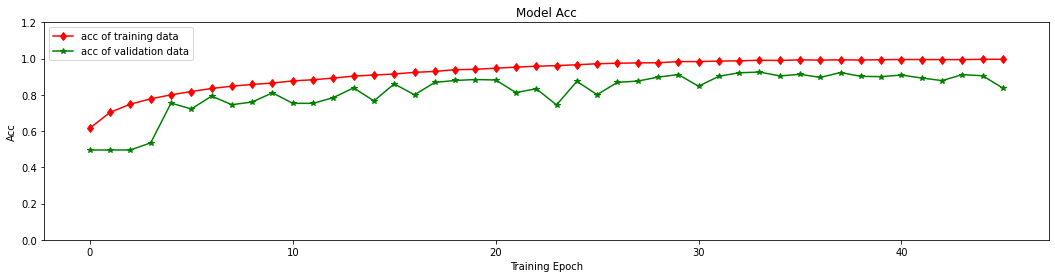

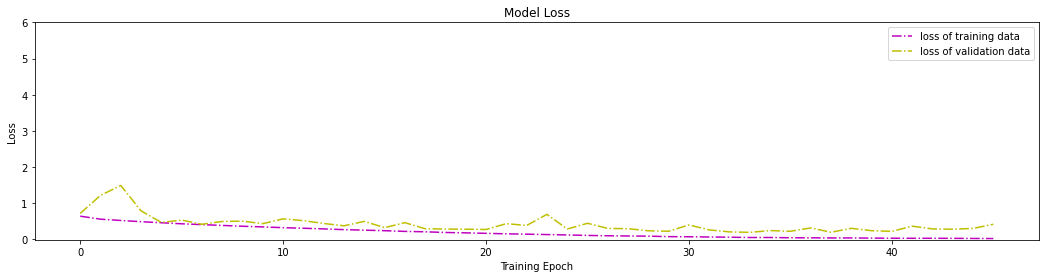

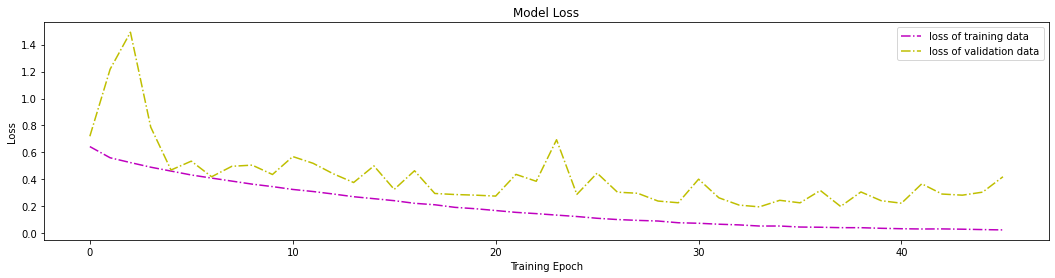

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)
Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 196s 9ms/step - loss: 0.7400 - accuracy: 0.5691 - val_loss: 0.6933 - val_accuracy: 0.5148
Epoch 2/500
20736/20736 [==============================] - 183s 9ms/step - loss: 0.5771 - accuracy: 0.6969 - val_loss: 0.7004 - val_accuracy: 0.4852
Epoch 3/500
20736/20736 [==============================] - 171s 8ms/step - loss: 0.5235 - accuracy: 0.7500 - val_loss: 0.7136 - val_accuracy: 0.4852
Epoch 4/500
20736/20736 [==============================] - 186s 9ms/step - loss: 0.4898 - accuracy: 0.7776 - val_loss: 0.6877 - val_accuracy: 0.5004
Epoch 5/500
20736/20736 [==============================] - 184s 9ms/step - loss: 0.4625 - accuracy: 0.7995 - val_loss: 0.5291 - val_accuracy: 0.7365
Epoch 6/500
20736/20736 [==============================] - 184s 9ms/step - los

20736/20736 [==============================] - 178s 9ms/step - loss: 0.0374 - accuracy: 0.9919 - val_loss: 0.2414 - val_accuracy: 0.9332
Epoch 55/500
20736/20736 [==============================] - 155s 7ms/step - loss: 0.0365 - accuracy: 0.9916 - val_loss: 0.2886 - val_accuracy: 0.9010
Epoch 56/500
20736/20736 [==============================] - 152s 7ms/step - loss: 0.0340 - accuracy: 0.9928 - val_loss: 0.2767 - val_accuracy: 0.9158
Epoch 57/500
20736/20736 [==============================] - 173s 8ms/step - loss: 0.0296 - accuracy: 0.9936 - val_loss: 0.2587 - val_accuracy: 0.9284
Epoch 58/500
20736/20736 [==============================] - 154s 7ms/step - loss: 0.0340 - accuracy: 0.9922 - val_loss: 0.3982 - val_accuracy: 0.8754
Epoch 59/500
20736/20736 [==============================] - 157s 8ms/step - loss: 0.0371 - accuracy: 0.9903 - val_loss: 0.3048 - val_accuracy: 0.9132
Epoch 60/500
20736/20736 [==============================] - 160s 8ms/step - loss: 0.0363 - accuracy: 0.9909 - val

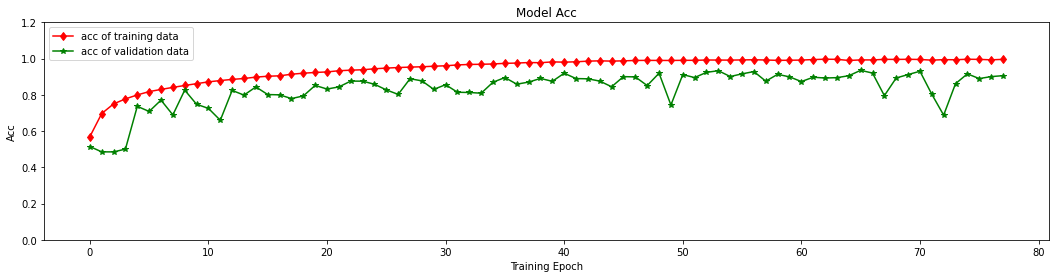

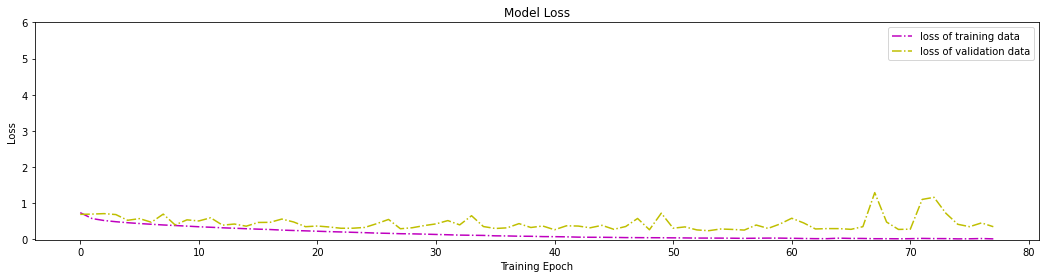

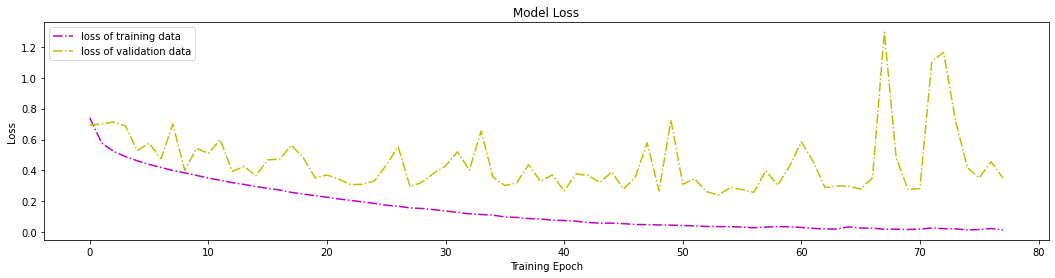

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)
Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 160s 8ms/step - loss: 0.6360 - accuracy: 0.6468 - val_loss: 0.7507 - val_accuracy: 0.5078
Epoch 2/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.5236 - accuracy: 0.7545 - val_loss: 2.0627 - val_accuracy: 0.5078
Epoch 3/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.4841 - accuracy: 0.7895 - val_loss: 3.9806 - val_accuracy: 0.5078
Epoch 4/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.4529 - accuracy: 0.8152 - val_loss: 3.4323 - val_accuracy: 0.5078
Epoch 5/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.4308 - accuracy: 0.8263 - val_loss: 1.1022 - val_accuracy: 0.5551
Epoch 6/500
20736/20736 [==============================] - 146s 7ms/step - los

20736/20736 [==============================] - 147s 7ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.3327 - val_accuracy: 0.9049
Epoch 55/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0233 - accuracy: 0.9935 - val_loss: 0.2236 - val_accuracy: 0.9358
Epoch 56/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 0.5667 - val_accuracy: 0.8281
Epoch 57/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.5363 - val_accuracy: 0.8589
Epoch 58/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.3386 - val_accuracy: 0.9076
Epoch 59/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.2507 - val_accuracy: 0.9271
Epoch 60/500
20736/20736 [==============================] - 146s 7ms/step - loss: 0.0151 - accuracy: 0.9966 - val

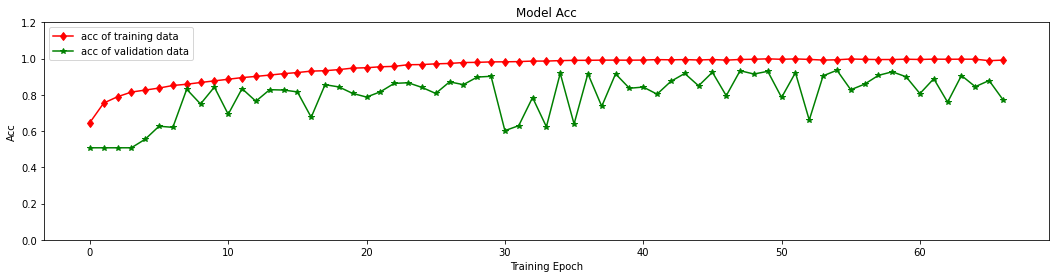

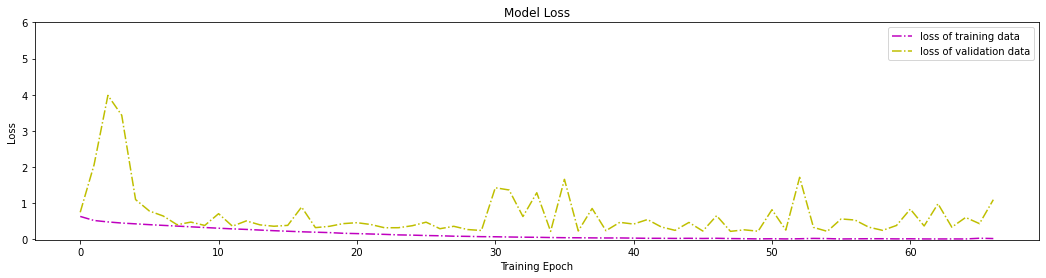

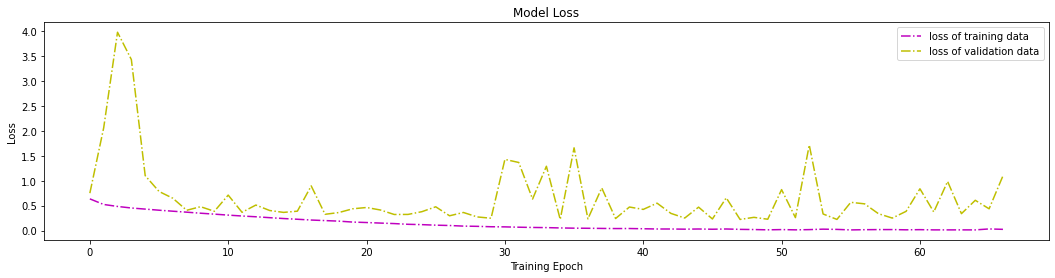

In [7]:
##-----------------------------------------------------------------------------
## CNN
##-----------------------------------------------------------------------------

TrainRun = 0
TrainModel = 3
MODELS = 1
for F in range(TrainModel):
    F = F + 1
    path = os.path.join(str(F), 'T'+ str(TrainRun))
    os.makedirs(path)

    
    EPOCHS = 500
    
    ##-----------------------------------------------------------------------------
    ## Training set & Testing set
    ##-----------------------------------------------------------------------------
    # rearrange the order of Intensity & Type
    #np.random.seed(1234)
    r = np.random.permutation(len(Intensity))
    x_train = Intensity[r]
    x_label = Type[r] -1    # 1,2----> 0,1
    print("x_train.shape={}, x_label.shape={}".format(x_train.shape, x_label.shape))

    ##-----------------------------------------------------------------------------
    ## Normalize Training set (z-score : (x-x.mean)/x.std)
    ##-----------------------------------------------------------------------------

    #x_train_Norm = np.zeros((x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]))
    #for iNum_Atom in range(x_train.shape[0]):
    #    x_train_Norm[iNum_Atom,:,:,:] = (x_train[iNum_Atom,:,:,:] - x_train[iNum_Atom,:,:,:].mean() )/ x_train[iNum_Atom,:,:,:].std()
    #print("x_train_Norm.shape={}".format(x_train_Norm.shape))    

    ##-----------------------------------------------------------------------------
    ## Reshape Training set & x_label ---> one hot
    ##-----------------------------------------------------------------------------
    x_train_NR = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
    x_label_R = np_utils.to_categorical(x_label, num_classes=2)

    print("x_train_NR.shape={}, x_label_R.shape={}".format(x_train_NR.shape, x_label_R.shape))
    ##-----------------------------------------------------------------------------
    ## CNN Model
    ##-----------------------------------------------------------------------------
    from keras import optimizers
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPooling3D, BatchNormalization
    from keras.layers import LeakyReLU, Activation
    from keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=12, verbose=2, mode='max', 
                                           restore_best_weights=True)

    from keras import backend as K

    tic1 = time.time()

    fp = open(str(F) + "/T" + str(TrainRun) + "/TrainingResult.txt", "w")  #####------------------------------ print
    fp_alltrainmodel = open(str(F) + "/T" + str(TrainRun) + "/AllTrainingModel.txt", "w") #####------------------------------ print
    fp_allvalidmodel = open("AllVaildationSet.txt", "w") #####------------------------------ print
    #----------------------------------------------------------------------------------------------------------------------

    #sess = tf.InteractiveSession()
    for m in range(MODELS):
        model = Sequential()
        model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', input_shape=(81,81,81,1), kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        #model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))        
        #model.add(Dropout(0.25))

        model.add(Flatten())

        #model.add(Dense(4096, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2)) 
        #model.add(Dropout(0.5))

        #model.add(Dense(256, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))
        
        #model.add(Dense(128, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))
        
        #model.add(Dense(32, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))


        model.add(Dense(8, kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        model.add(Dense(4, kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        model.add(Dense(2, activation='softmax'))

        optimizerAdam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
        #model.compile(loss=focal_loss, optimizer=optimizerAdam, metrics=['accuracy'])
        model.compile(loss='categorical_crossentropy', optimizer=optimizerAdam, metrics=['accuracy']) 
        #optimizerRMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, decay=0.0)
        #model.compile(loss='binary_crossentropy', optimizer=optimizerRMSprop, metrics=['accuracy']) 


        #sess = tf.InteractiveSession()
        #gpu_options = tf.GPUOptions(allow_growth=True)
        #sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
        # 設定 Keras 使用的 Session
        #    tf.keras.backend.set_session(sess) 
        #reset_keras()
        #sess.run(tf.global_variables_initializer())

        tic0 = time.time()
        #------------------------------------------------------------------------------------------------------------------
        fp_trainmodel = open(str(F) + "/T" + str(TrainRun) + "/TrainingModel%s.txt" %(m), "w") #####------------------------------ print
        fp_validmodel = open(str(F) + "/T" + str(TrainRun) + "VaildationSet%s.txt" %(m), "w") #####------------------------------ print
        #------------------------------------------------------------------------------------------------------------------
        #model.load_weights('my_CNNmodel_%d.h5'%(m))
        #model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
        train_history=model.fit(x = x_train_NR, y = x_label_R, validation_split=0.1, validation_data=None, epochs=EPOCHS, 
                                batch_size=128, verbose=1, shuffle=True, callbacks = [early_stopping_monitor])

        train_loss, train_accuracy = model.evaluate(x_train_NR, x_label_R)
        #-------------------
        toc0 = time.time()
        #-------------------
        model.save(str(F) + '/my_CNNmodel_%d.h5'%(m))    
        #----------------------------------------------------------------------       
        # Print loss & acc
        #------------------------------------------------------------------------------------------------------------------
        for e in range(early_stopping_monitor.stopped_epoch):
            trainmodellines1 = ("%4d, %10.3e, %4.6g\n"%(e, train_history.history['loss'][e], 
                                                           train_history.history['accuracy'][e]))
            fp_trainmodel.writelines(trainmodellines1)
            alltrainmodellines1 = ("%4d, %4d, %10.3e, %4.6g\n"%(m, e, train_history.history['loss'][e], 
                                                                      train_history.history['accuracy'][e]))
            fp_alltrainmodel.writelines(alltrainmodellines1)            
            #------------------ valid    
            validmodellines1 = ("%4d, %10.3e, %4.6g\n"%(e, train_history.history['val_loss'][e], 
                                                           train_history.history['val_accuracy'][e]))
            fp_validmodel.writelines(validmodellines1)
            allvalidmodellines1 = ("%4d, %4d, %10.3e, %4.6g\n"%(m, e, train_history.history['val_loss'][e], 
                                                                      train_history.history['val_accuracy'][e]))
            fp_allvalidmodel.writelines(allvalidmodellines1)        
        fp_trainmodel.close() #####------------------------------ print
        fp_validmodel.close() #####------------------------------ print
        #------------------------------------------------------------------------------------------------------------------
        print("Training %s is completed!"%(m))
        print("Time=" + str((toc0-tic0)) + "sec")
        lines1 = ("model: %4d, epoch: %4d, train_loss: %10.3e, train accuracy: %4.6g, time: %4.6g\n"
                  %(m, e, train_loss, train_accuracy, toc0-tic0))
        fp.writelines(lines1)
        #-------------------
        K.clear_session()
        #tf.keras.backend.clear_session()
        #K.clear_session()
        #del model
        #sess.close()
        #model.reset_states()
    #----------------------------------------------------------------------------------------------------------------------    
    toc1 = time.time()
    print("------------------------------------------------------------------------------------------------------") 
    print("All Training is completed!")
    print("All Time=" + str((toc1-tic1)) + "sec")

    lines2 = "All Time=" + str((toc1-tic1)) + "sec\n"
    fp.writelines(lines2)

    fp.close()#####------------------------------ print
    fp_alltrainmodel.close() #####------------------------------ print
    fp_allvalidmodel.close() #####------------------------------ print
    
    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['accuracy'], "r-d", label="acc of training data")
    plt.plot(train_history.history['val_accuracy'], "g-*", label="acc of validation data")
    plt.title('Model Acc')
    plt.ylabel('Acc')
    plt.xlabel('Training Epoch')
    plt.ylim([0, 1.2])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'acc-{}.png'.format(TrainRun+1), format='png')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['loss'], "m-.", label="loss of training data")
    plt.plot(train_history.history['val_loss'], "y-.", label="loss of validation data")
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.ylim([-0.01,6.0])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'loss-{}.png'.format(TrainRun+1), format='png')
    plt.show()
    
    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['loss'], "m-.", label="loss of training data")
    plt.plot(train_history.history['val_loss'], "y-.", label="loss of validation data")
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    #plt.ylim([-0.01,8.0])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'lossR-{}.png'.format(TrainRun+1), format='png')
    plt.show()


